In [173]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [174]:
# Load the data into a Pandas DataFrame
df = pd.read_csv("Advertising.csv")

In [175]:
# Explore the data
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [176]:
df.tail(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
190,191,39.5,41.1,5.8,10.8
191,192,75.5,10.8,6.0,9.9
192,193,17.2,4.1,31.6,5.9
193,194,166.8,42.0,3.6,19.6
194,195,149.7,35.6,6.0,17.3
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [177]:
df.shape

(200, 5)

In [178]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [179]:
df = df.drop('Unnamed: 0', axis=1)

In [180]:
# Check for missing values
print(df.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [181]:
# View the data types and non-null counts of each variable
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [182]:
# Check for duplicated rows
print(df.duplicated().sum())

0


In [183]:
# Explore the data
# View the summary statistics of the numerical variables
print(df.describe())


               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [184]:
# Remove outliers
df = df[(np.abs(df['TV'] - df['TV'].mean()) / df['TV'].std()) < 3]

<AxesSubplot:>

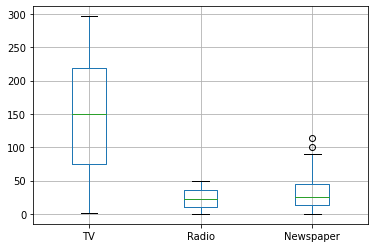

In [185]:
# Check for outliers using box plots
df.boxplot(column=['TV', 'Radio', 'Newspaper'])

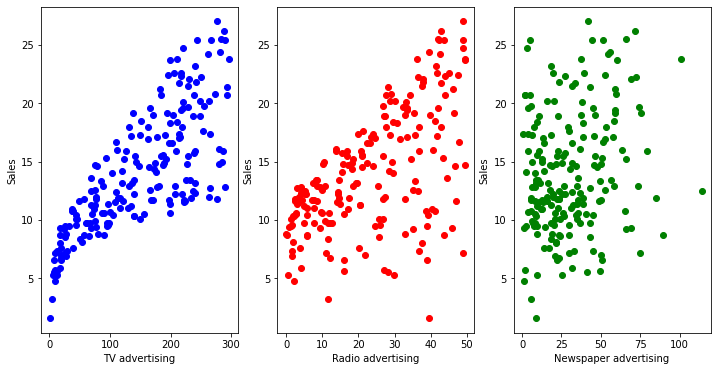

In [186]:
# Visualize the data
# Create scatter plots to visualize the relationships between TV, Radio, Newspaper advertising and Sales
plt.figure(figsize=(12,6))

plt.subplot(1, 3, 1)
plt.scatter(df['TV'], df['Sales'], color='blue')
plt.xlabel('TV advertising')
plt.ylabel('Sales')

plt.subplot(1, 3, 2)
plt.scatter(df['Radio'], df['Sales'], color='red')
plt.xlabel('Radio advertising')
plt.ylabel('Sales')

plt.subplot(1, 3, 3)
plt.scatter(df['Newspaper'], df['Sales'], color='green')
plt.xlabel('Newspaper advertising')
plt.ylabel('Sales')

plt.show()

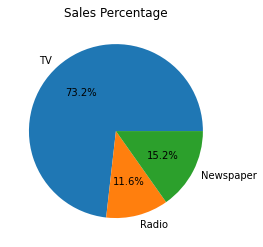

In [187]:
# Compute the total sales for each advertising medium
total_tv_sales = df['TV'].sum()
total_radio_sales = df['Radio'].sum()
total_newspaper_sales = df['Newspaper'].sum()

# Create a list of labels for the pie chart
labels = ['TV', 'Radio', 'Newspaper']

# Create a list of values for the pie chart
values = [total_tv_sales, total_radio_sales, total_newspaper_sales]

# Create a pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Sales Percentage')

plt.show()

In [188]:
# Split the data into training and testing sets
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [189]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [190]:
# Make predictions 
#Predict sales for the test set
y_pred = model.predict(X_test)
print(y_pred)

[16.4080242  20.88988209 21.55384318 10.60850256 22.11237326 13.10559172
 21.05719192  7.46101034 13.60634581 15.15506967  9.04831992  6.65328312
 14.34554487  8.90349333  9.68959028 12.16494386  8.73628397 16.26507258
 10.27759582 18.83109103 19.56036653 13.25103464 12.33620695 21.30695132
  7.82740305  5.80957448 20.75753231 11.98138077  9.18349576  8.5066991
 12.46646769 10.00337695 21.3876709  12.24966368 18.26661538 20.13766267
 14.05514005 20.85411186 11.0174441   4.56899622]


In [191]:
# Evaluate the model
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean squared error: 3.1740973539761033
R-squared: 0.899438024100912


In [192]:
# Deploy and monitor the model
# Save the model as a file
import pickle
with open('sales_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [193]:
# Load the model from the file
with open('sales_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [194]:
# Create a DataFrame with the new data and feature names
new_df = pd.DataFrame({'TV': [166.8], 'Radio': [42.0], 'Newspaper': [3.6]})

# Make a prediction using the trained model
new_y_pred = loaded_model.predict(new_df)

# Print the prediction
print('Predicted sales:', new_y_pred[0])


Predicted sales: 18.396083141377247
